### Homework 1 - Question 5 - Luke Arend

First we implement Gram-Schmidt.

In [202]:
import numpy as np

In [203]:
def randvec(n):
    return np.random.randn(n)

def normalize(v):
    return v / np.sqrt(np.dot(v, v))

def add_next_column(X):
    if X.shape[0] == X.shape[1]:
        return X
    
    v = randvec(X.shape[1])
    for u in X:
        v -= np.dot(u, v) * u
    v = normalize(v)
    X = np.concatenate([X, [v]])
    return add_next_column(X)

In [204]:
def gramschmidt(n):
    X = np.zeros((0, n))
    return add_next_column(X)

Next we generate a 3x3 orthonormal matrix $U$ using Gram-Schmidt.

In [205]:
U = gramschmidt(3)
U

array([[-0.99004581,  0.07805241, -0.11712007],
       [-0.14062444, -0.58307421,  0.80015576],
       [-0.00583561,  0.8086608 ,  0.58824625]])

We plot the columns of $U$ to see whether they are orthogonal and unit length.

In [212]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


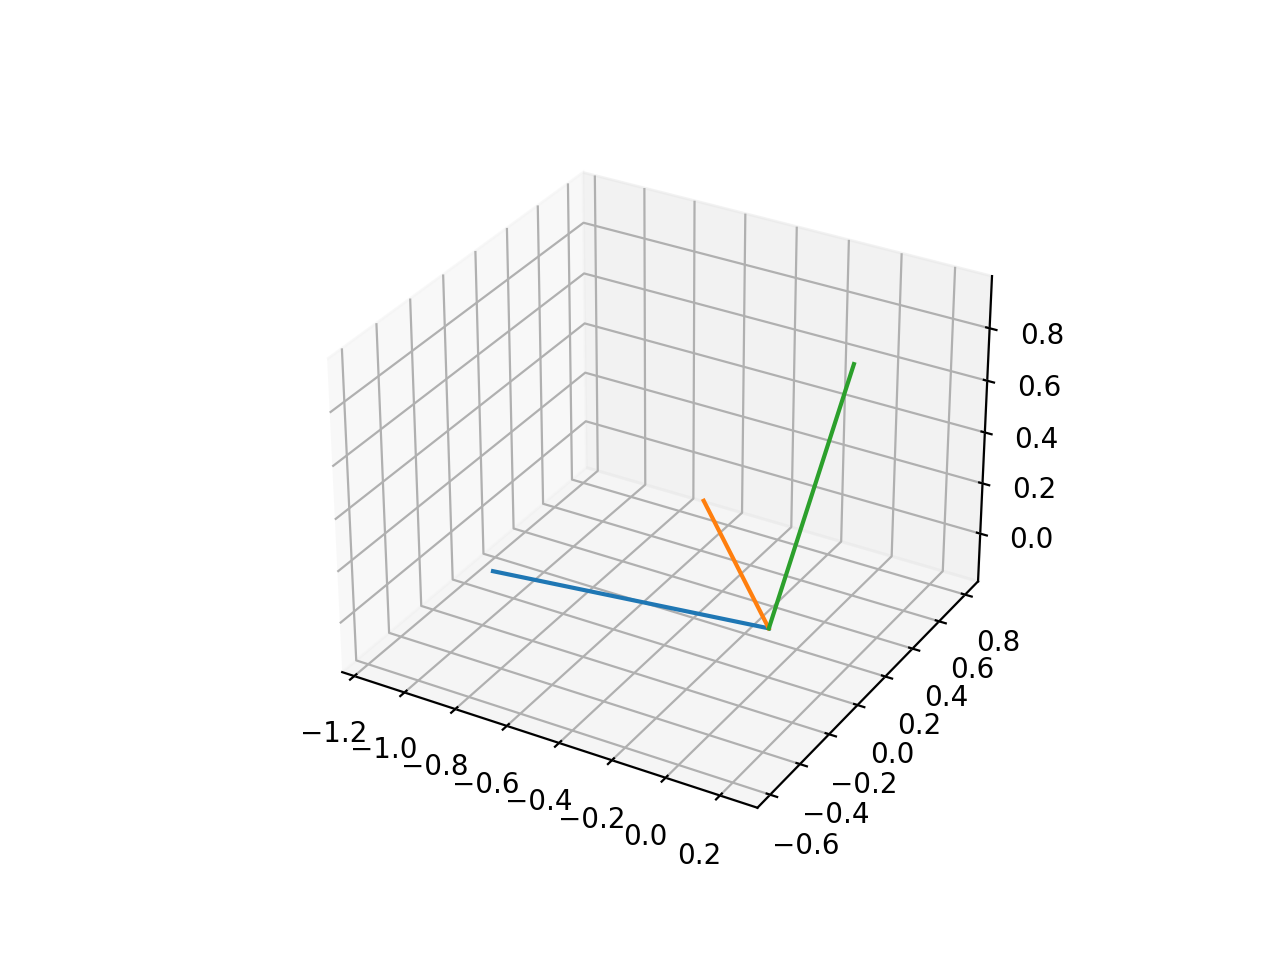

In [213]:
%matplotlib notebook
ax = plt.subplot(projection='3d')
for i in range(3):
    plt.plot(xs=[0, U[0, i]], ys=[0, U[1, i]], zs=[0, U[2, i]])
plt.axis('square')
plt.show()

$U$ appears to be orthonormal based on the figure above.

Let's show that $U$ is orthonormal for dimensionality N = 1000.

In [200]:
%%time
U = gramschmidt(1000)

CPU times: user 1.18 s, sys: 389 ms, total: 1.57 s
Wall time: 1.84 s


In [201]:
np.allclose(np.dot(U, U.T), np.identity(1000))

True

$U$ is orthonormal since the inverse of $U$ is its transpose.

Also note that each row and column of $U$ has magnitude 1.

In [210]:
np.sqrt(np.sum(U * U, axis=0))

array([1., 1., 1.])

In [211]:
np.sqrt(np.sum(U * U, axis=1))

array([1., 1., 1.])